# Semi-Analytic Solutions for Simple Structures

## Simply-Supported Rectangular Plates

In [14]:
import numpy as np

from sigmaepsilon.mesh.grid import grid
from sigmaepsilon.mesh import triangulate
from sigmaepsilon.mesh.utils.topology.tr import Q4_to_T3

from sigmaepsilon.solid.fourier import (
    RectangularPlate,
    LoadGroup,
    PointLoad,
    RectangleLoad,
)

size = Lx, Ly = (600.0, 800.0)
E = 2890.0
nu = 0.2
t = 25.0

G = E / 2 / (1 + nu)
D = (
    np.array([[1, nu, 0], [nu, 1, 0], [0.0, 0, (1 - nu) / 2]])
    * t**3
    * (E / (1 - nu**2))
    / 12
)
S = np.array([[G, 0], [0, G]]) * t * 5 / 6

loads = LoadGroup(
    LG1=LoadGroup(
        LC1=RectangleLoad(x=[[0, 0], [Lx, Ly]], v=[-0.1, 0, 0]),
        LC2=RectangleLoad(x=[[Lx / 3, Ly / 2], [Lx / 2, 2 * Ly / 3]], v=[-1, 0, 0]),
    ),
    LG2=LoadGroup(
        LC3=PointLoad(x=[Lx / 3, Ly / 2], v=[-100.0, 0, 0]),
        LC4=PointLoad(x=[2 * Lx / 3, Ly / 2], v=[100.0, 0, 0]),
    ),
)
loads.lock()

shape = nx, ny = (30, 40)
gridparams = {"size": size, "shape": shape, "eshape": "Q4"}
coords, topo = grid(**gridparams)
coords, triangles = Q4_to_T3(coords, topo)
triobj = triangulate(points=coords[:, :2], triangles=triangles)[-1]

#triobj = triangulate(size=size, shape=shape)[-1]
#mesh = PolyData(coords=coords, topo=triangles)

plate = RectangularPlate(size, (20, 20), D=D, S=S)
#plate = RectangularPlate(size, (20, 20), D=D)
results = plate.solve(loads, coords)

In [21]:
type(results["LG1", "LC1"])

xarray.core.dataarray.DataArray

In [15]:
results["LG1", "LC1"]

<xarray.DataArray (point: 1271, component: 13)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.66672915e+03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.05969549e-02, ...,
         1.65129911e+03, -4.23865601e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  2.10078769e-02, ...,
         1.60988907e+03, -7.63488404e+00,  0.00000000e+00],
       ...,
       [-4.96704680e-16,  1.19866314e-17, -2.10078769e-02, ...,
         1.60988907e+03,  7.63488404e+00,  3.23383741e-15],
       [-2.50759770e-16,  1.22825897e-17, -1.05969549e-02, ...,
         1.65129911e+03,  4.23865601e+00,  4.26351120e-15],
       [-4.22700717e-31,  1.23917015e-17, -1.77745795e-17, ...,
         1.66672915e+03,  1.13959793e-14,  4.76633659e-15]])
Coordinates:
  * point      (point) int32 0 1 2 3 4 5 6 ... 1265 1266 1267 1268 1269 1270
  * component  (component) <U4 'UZ' 'ROTX' 'ROTY' 'CX' ... 'MY' 'MXY' 'QX' 'QY'

In [16]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sigmaepsilon.mesh.plotting import triplot_mpl_data

plt.style.use("default")


UZ, ROTX, ROTY, CX, CY, CXY, EXZ, EYZ, MX, MY, MXY, QX, QY = list(range(13))
labels = {
    UZ: "UZ",
    ROTX: "ROTX",
    ROTY: "ROTY",
    CX: "CX",
    CY: "CY",
    CXY: "CXY",
    EXZ: "EXZ",
    EYZ: "EYZ",
    MX: "MX",
    MY: "MY",
    MXY: "MXY",
    QX: "QX",
    QY: "QY",
}
ilabels = {k: i for i, k in enumerate(labels)}


def plot2d(res2d):
    fig = plt.figure(figsize=(8, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "jet"
    gs = gridspec.GridSpec(1, 3)
    for i, key in enumerate([UZ, ROTX, ROTY]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot_mpl_data(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            nlevels=10,
            lw=0
        )
    fig.suptitle("Displacements", fontsize=16)
    fig.tight_layout()

    fig = plt.figure(figsize=(12, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "seismic"
    gs = gridspec.GridSpec(1, 5)
    for i, key in enumerate([CX, CY, CXY, EXZ, EYZ]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot_mpl_data(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            nlevels=10,
            lw=0
        )
    fig.suptitle("Strains", fontsize=16)
    fig.tight_layout()
    
    fig = plt.figure(figsize=(12, 3))  # in inches
    fig.patch.set_facecolor("white")
    cmap = "seismic"
    gs = gridspec.GridSpec(1, 5)
    for i, key in enumerate([MX, MY, MXY, QX, QY]):
        ikey = ilabels[key]
        ax = fig.add_subplot(gs[i])
        triplot_mpl_data(
            triobj,
            ax=ax,
            fig=fig,
            title=labels[key],
            data=res2d[:, ikey],
            cmap=cmap,
            axis="off",
            nlevels=10,
            lw=0
        )
    fig.suptitle("Internal forces and moments", fontsize=16)
    fig.tight_layout()

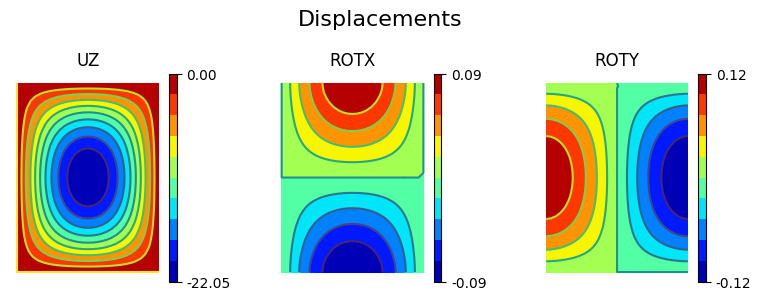

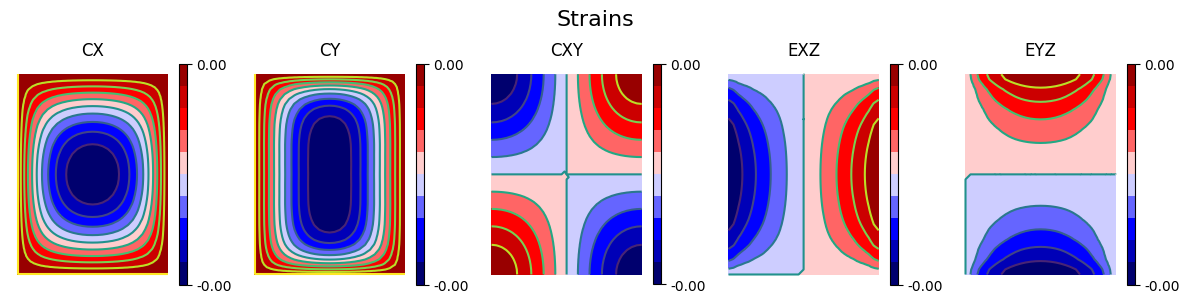

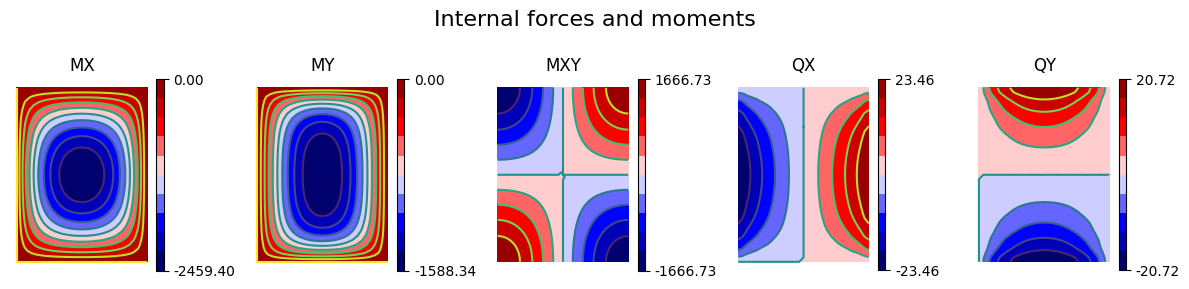

In [17]:
plot2d(results["LG1", "LC1"].values)

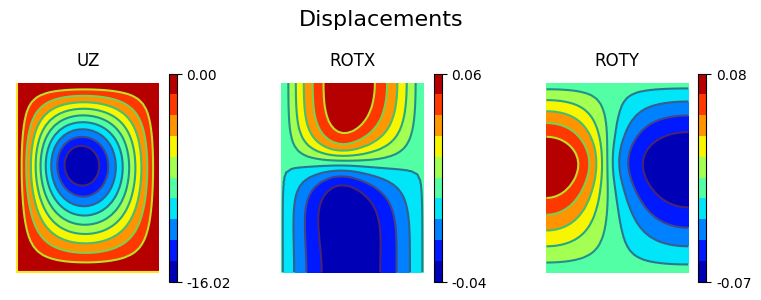

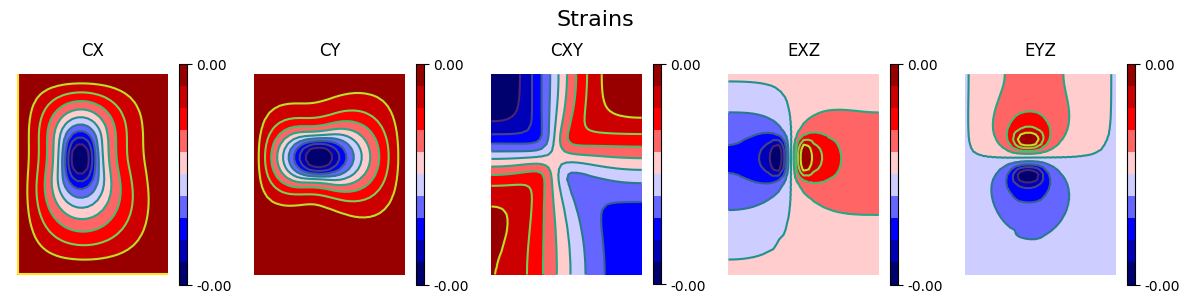

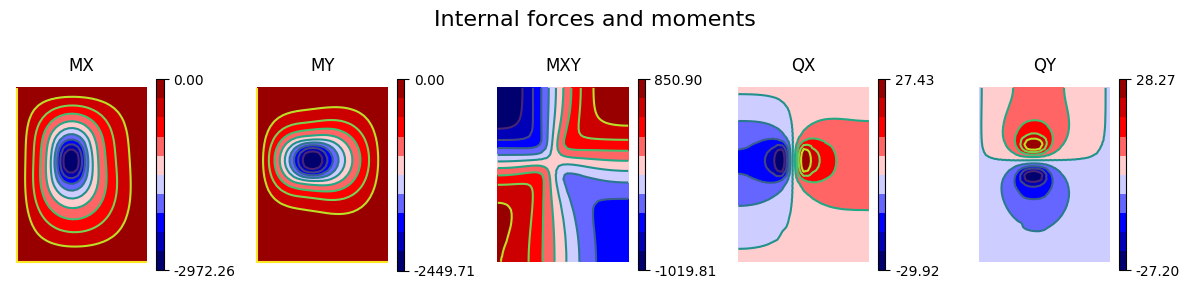

In [18]:
plot2d(results["LG1", "LC2"].values)

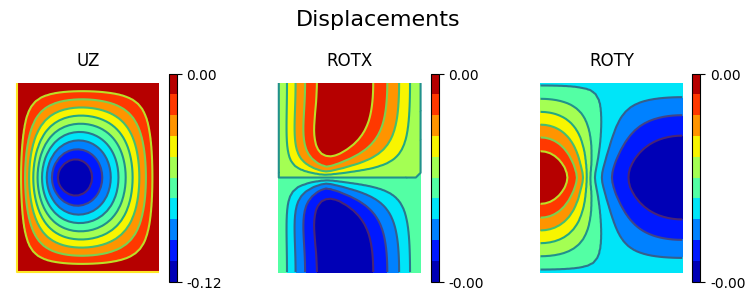

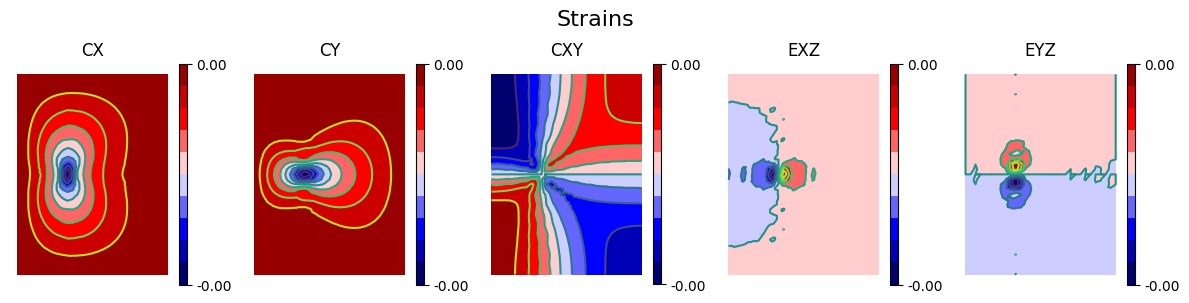

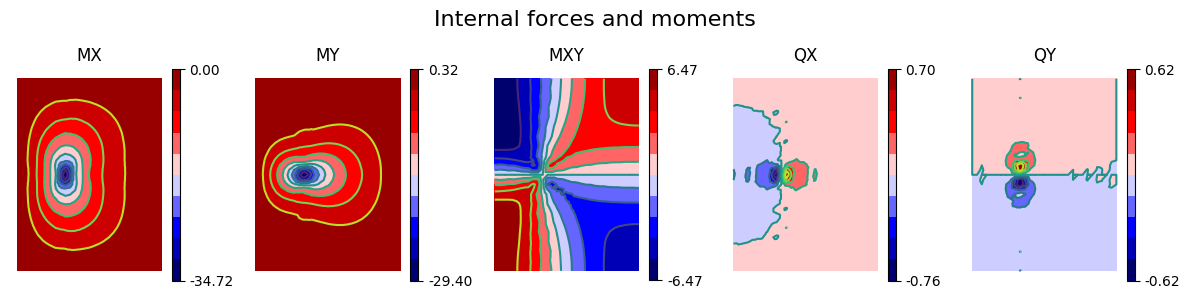

In [19]:
plot2d(results["LG2", "LC3"].values)

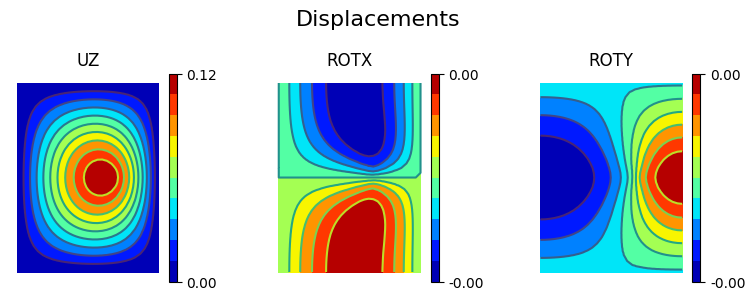

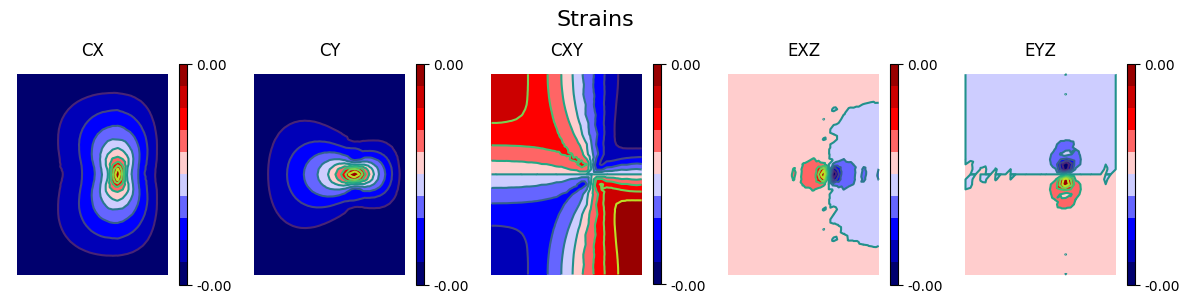

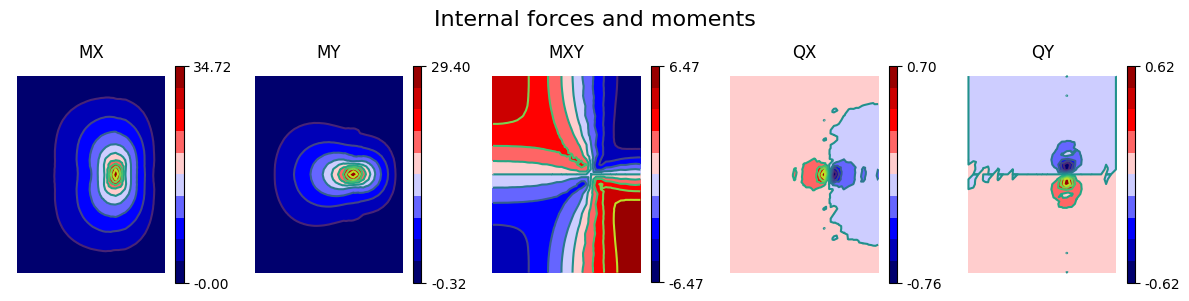

In [20]:
plot2d(results["LG2", "LC4"].values)